In [8]:
from duel import duel
from board import Board
from agent_tabular_qlearning import Agent_TQL as atql
from agent_value_iteration import AgentVI as avi
from base_agent import remap_stringkeys, remap_values
import json
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

In [4]:
agentQ = atql()
agentV = avi()
agentQ.values = remap_stringkeys(json.load(open("qvalues.txt")))
agentV.values = remap_stringkeys(json.load(open("values.txt")))
agentV.rewards = remap_stringkeys(json.load(open("rewards.txt")))

In [5]:
playerX = agentQ
playerO = agentV
playerO.values = remap_values(playerO.values)
playerO.rewards = remap_values(playerO.rewards)

In [17]:
games = 10000
prob = []
for k in range(1,games+1):
    winner_value = duel(playerX, playerO, show=False)
    if winner_value == 2:
        playerO.wins += 1
        playerX = playerO
        playerO = playerX
        
        try:
           playerO.rewards = remap_values(playerO.rewards) 
        except AttributeError:
            pass
        
        try:
           playerX.rewards = remap_values(playerX.rewards) 
        except AttributeError:
            pass
        
        playerX.values = remap_values(playerX.values)
        playerO.values = remap_values(playerO.values)
    else:
        playerX.wins += 1
        
    if k % 10 == 0:
        prob.append(agentQ.wins/k)


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       

        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       

        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       

        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

       


             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        

             X | X | O
            ----------
             X | O | O
            ----------
             O |  | X
        


In [ ]:
vals = [(k,v) for k, v in agentQ.values.items() if v != 0]

In [11]:
agentQ.wins

0

Text(0, 0.5, 'Probabilidad')

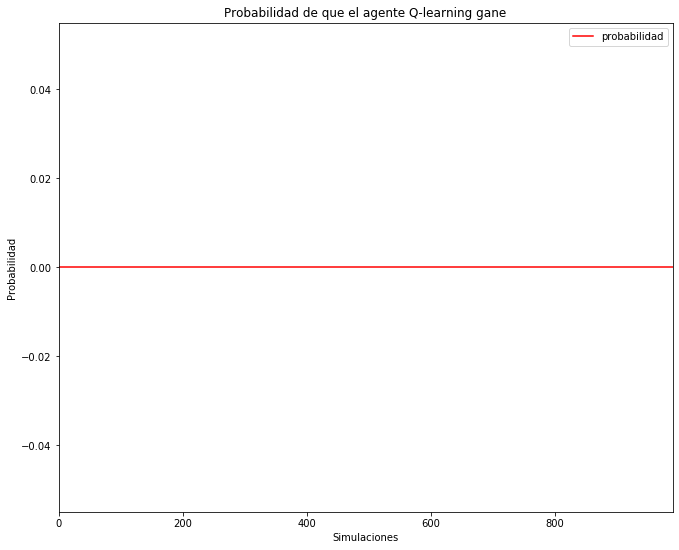

In [9]:
df = pd.DataFrame({ 'probabilidad' : prob})

figsize(11, 9)
df.plot(title='Probabilidad de que el agente Q-learning gane',color='r')
plt.xlabel("Simulaciones")
plt.ylabel("Probabilidad")

In [12]:
x = set()

In [13]:
x.add(2)

In [14]:
x

{2}

In [15]:
x.add(2)

In [16]:
x

{2}